This Demo shows how to work with different Trees loaded from the Graph Database. 

In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()

## Import biospytial modules

In [3]:
from drivers.tree_builder import TreeNeo
from drivers.graph_models import graph, Mex4km
from mesh.models import MexMesh
from gbif.taxonomy import Occurrence, Taxonomy, GriddedTaxonomy
from drivers.graph_models import Cell
from drivers.tree_builder import extractOccurrencesFromTaxonomies

### How to work with custom polygons ?

In [4]:
from django.contrib.gis.geos import GEOSGeometry
polystr = "POLYGON((-109 27,-106 27,-106 30,-109 30,-109 27))"
polygon = GEOSGeometry(polystr)

### Load mesh class

In [5]:
mexgrid = MexMesh.objects.filter(cell__intersects=polygon)

### Instantiate the biosphere

In [6]:
biosphere = Occurrence.objects.all()

### Filter by geometry

In [7]:
subbiosphere = biosphere.filter(geom__intersects=polygon)

### Instantiate Gridded Taxonomy

In [14]:
ggg = GriddedTaxonomy(subbiosphere,mexgrid.filter(cell__intersects=polygon),'mex4km',generate_tree_now=False,use_id_as_name=False)

### Load some trees
If we load all of them it will take a lot of time (31 mins (in local machine)).

In [20]:
taxonomies = list(ggg.taxonomies[0:200])

In [22]:
ggg.taxonomies[:10]

[< Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom,
 < Taxonomy in %s > %geom]

### Let's load the data from the graphdb

In [19]:
trees = map(lambda t : t.loadFromGraphDB(),taxonomies[:10])

TypeError: __init__() got an unexpected keyword argument 'cell_object'

### Sort it, ... ;)

In [ ]:
trees.sort(key=lambda l : l.richness, reverse=True)

In [ ]:
trees[0].richness

### Ok, let's explore this *super* node

In [ ]:
st = trees[0]

### mmhh... vertebrates ? 

In [105]:
st.to_Animalia.to_Chordata

<TreeNode | Phylum: Chordata - n.count : 30- >

### Let birds be :

In [106]:
birds = st.to_Animalia.to_Chordata.to_Aves

In [107]:
birds.richness

4

### Give me environmental conditions

In [108]:
environment = birds.associatedData.getEnvironmentalVariablesPoints()

In [109]:
environment

,MaxTemperature_mean,MaxTemperature_std,MeanTemperature_mean,MeanTemperature_std,MinTemperature_mean,MinTemperature_std,Precipitation_mean,Precipitation_std,Vapor_mean,Vapor_std,SolarRadiation_mean,SolarRadiation_std,WindSpeed_mean,WindSpeed_std
0,2.166667,5.828569,11.916667,5.780114,21.416667,5.648869,32.75,29.115073,0.5,0.5,18873.25,4659.300683,3.416667,0.640095
1,2.166667,5.828569,11.916667,5.780114,21.416667,5.648869,32.75,29.115073,0.5,0.5,18873.25,4659.300683,3.416667,0.640095
2,2.166667,5.828569,11.916667,5.780114,21.416667,5.648869,32.75,29.115073,0.5,0.5,18873.25,4659.300683,3.416667,0.640095
3,2.166667,5.828569,11.916667,5.780114,21.416667,5.648869,32.75,29.115073,0.5,0.5,18873.25,4659.300683,3.416667,0.640095


## Explore the neighbours

In [110]:
ns = birds.getNeighboringTrees()

In [111]:
ns

In [112]:
ns.getCooccurrenceMatrix(taxonomic_level=3)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


,Amphibia,Aves,Insecta,Liliopsida,Magnoliopsida,Mammalia,Pinopsida,Polypodiopsida,Reptilia
0,0,1,1,0,0,1,0,0,1
1,0,0,1,0,1,0,0,0,1
2,0,0,0,1,1,0,1,0,0
3,0,1,0,0,0,1,0,0,0
4,1,1,1,1,1,1,1,1,1


### Expand the neighbourhood to size 3

In [113]:
ns.expandNeighbourhood(4)

In [114]:
big_tree = ns.extendedTree

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


In [115]:
big_tree

<LocalTree Of Life | Root: LUCA - n.count : 2825- >

In [116]:
ns.getCooccurrenceMatrix(taxonomic_level=3)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


,Actinopterygii,Amphibia,Aves,Insecta,Liliopsida,Magnoliopsida,Mammalia,Pinopsida,Polypodiopsida,Reptilia
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,1,1,0,1,0,0
3,0,0,1,1,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0
7,0,1,1,0,0,1,1,1,0,1
8,0,0,0,0,0,0,1,0,0,0
9,1,0,0,0,0,0,0,0,0,0


In [117]:
big_tree.getExactCells()

[<Cell id=178735>,
 <Cell id=178734>,
 <Cell id=179333>,
 <Cell id=179331>,
 <Cell id=179332>,
 <Cell id=179329>,
 <Cell id=179330>,
 <Cell id=182276>,
 <Cell id=182275>,
 <Cell id=182274>,
 <Cell id=179930>,
 <Cell id=180523>,
 <Cell id=179927>,
 <Cell id=179926>,
 <Cell id=179925>,
 <Cell id=179924>,
 <Cell id=179929>,
 <Cell id=179928>,
 <Cell id=180522>,
 <Cell id=180521>,
 <Cell id=180520>,
 <Cell id=180519>,
 <Cell id=181695>,
 <Cell id=181694>,
 <Cell id=181693>,
 <Cell id=181692>,
 <Cell id=178131>,
 <Cell id=181696>,
 <Cell id=182852>,
 <Cell id=181108>,
 <Cell id=181107>,
 <Cell id=181111>,
 <Cell id=181109>]

In [118]:
raster = big_tree.associatedData.getAssociatedRasterAreaData('SolarRadiation')

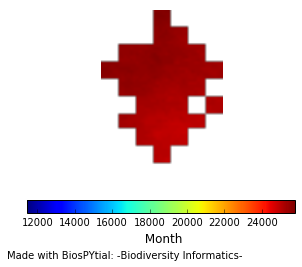

In [119]:
raster.display_field(band=6)

In [120]:
neighbours = ns.neighbours

### Which neighbours have birds ?

In [138]:
map(lambda neighbour : neighbour.hasNode(birds) , neighbours)

[False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

### Filter the neighbours that have birds! 

In [139]:
birds

<TreeNode | Class: Aves - n.count : 4- >

In [136]:
filter(lambda neighbour : neighbour.hasNode(birds), neighbours)

[<LocalTree Of Life | Root: LUCA - n.count : 122- >,
 <LocalTree Of Life | Root: LUCA - n.count : 524- >,
 <LocalTree Of Life | Root: LUCA - n.count : 82- >,
 <LocalTree Of Life | Root: LUCA - n.count : 39- >,
 <LocalTree Of Life | Root: LUCA - n.count : 1- >,
 <LocalTree Of Life | Root: LUCA - n.count : 27- >,
 <LocalTree Of Life | Root: LUCA - n.count : 490- >,
 <LocalTree Of Life | Root: LUCA - n.count : 2- >,
 <LocalTree Of Life | Root: LUCA - n.count : 807- >,
 <LocalTree Of Life | Root: LUCA - n.count : 198- >,
 <LocalTree Of Life | Root: LUCA - n.count : 1- >,
 <LocalTree Of Life | Root: LUCA - n.count : 2- >]